本小节大家已经看了不少文章了。可能有些同学觉得那些文章没有什么用。其实它们都是很有用的干货。我会通过3个实战编程向大家展示这些文章里面的知识是多大的强大。

第一个实战编程就是初始化参数。

训练一个神经网络模型就是要找到一组特殊的参数。这个模型配上这组参数后，就拥有了某项能力，例如可以识别猫。所以，找参数才是训练的最终目的。所以，参数的初始化非常重要。

如果参数被初始化得离理想参数很远很远，那么就需要很长很长的时间来进行梯度下降才能到达理想参数。打比方说，w的理想值是2，而你将w初始化为1000，每次梯度下降又只能使w靠近理想值1个单位，那么要进行998次梯度下降才能找到理想参数；如果将w初始化为10，那么就只需要8次。

更坏的情况是，如果参数初始化得不合理，那么有可能会导致无论怎么样训练都无法找到理想值，你的模型永远不可能被训练成功。

本次实战编程向大家展示了3种不同的初始化方法，只有初始化不同而已，其它都是一样的，但结果却有3种：一种是无法找到理想值，另外一种是很长时间才能找到理想值，最后一种却很快就找到理想值了。

In [17]:
# 加载系统工具库
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets

# 加载自定义的工具库
from init_utils import *

# 设置好画图工具
%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

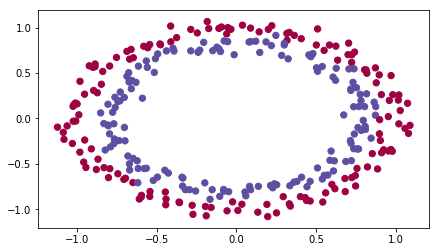

In [18]:
# 加载我们用算法生成的假数据并把它们画出来（只画了训练数据，没有画测试数据）。
# 我们的目的就是训练一个模型，使其能够将红点和蓝点区分开。
train_X, train_Y, test_X, test_Y = load_dataset()

In [19]:
# 构建一个模型，实现细节很多都在我们自定义的工具库init_utils.py里面。因为那些细节我们之前已经学过，
# 所以为了突出重点，就把它们隐藏在工具库里面了。
# 这个模型的特点是，它可以指定3种不同的初始化方法，通过参数initialization来控制
def model(X, Y, learning_rate=0.01, num_iterations=15000, print_cost=True, initialization="he"):        
    grads = {}
    costs = [] 
    m = X.shape[1]
    layers_dims = [X.shape[0], 10, 5, 1] # 构建一个3层的神经网络
    
    # 3种不同的初始化方法，后面会对这3种初始化方法进行详细介绍
    if initialization == "zeros":
        parameters = initialize_parameters_zeros(layers_dims)
    elif initialization == "random":
        parameters = initialize_parameters_random(layers_dims)
    elif initialization == "he":
        parameters = initialize_parameters_he(layers_dims)

    # 梯度下降训练参数
    for i in range(0, num_iterations):
        a3, cache = forward_propagation(X, parameters)
        cost = compute_loss(a3, Y)
        grads = backward_propagation(X, Y, cache)
        parameters = update_parameters(parameters, grads, learning_rate)

        if print_cost and i % 1000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
            costs.append(cost)
            
    # 画出成本走向图
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

In [20]:
# 这是我们要介绍的第一种方法。是最差的方法。也是我们学习过的第一种方法——全部初始化为0
def initialize_parameters_zeros(layers_dims):    
    parameters = {}
    L = len(layers_dims)            
    
    for l in range(1, L):
        parameters['W' + str(l)] = np.zeros((layers_dims[l], layers_dims[l - 1]))
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
    return parameters

In [21]:
# 单元测试
parameters = initialize_parameters_zeros([3,2,1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[0. 0. 0.]
 [0. 0. 0.]]
b1 = [[0.]
 [0.]]
W2 = [[0. 0.]]
b2 = [[0.]]


Cost after iteration 0: 0.6931471805599453
Cost after iteration 1000: 0.6931471805599453
Cost after iteration 2000: 0.6931471805599453
Cost after iteration 3000: 0.6931471805599453
Cost after iteration 4000: 0.6931471805599453
Cost after iteration 5000: 0.6931471805599453
Cost after iteration 6000: 0.6931471805599453
Cost after iteration 7000: 0.6931471805599453
Cost after iteration 8000: 0.6931471805599453
Cost after iteration 9000: 0.6931471805599453
Cost after iteration 10000: 0.6931471805599455
Cost after iteration 11000: 0.6931471805599453
Cost after iteration 12000: 0.6931471805599453
Cost after iteration 13000: 0.6931471805599453
Cost after iteration 14000: 0.6931471805599453


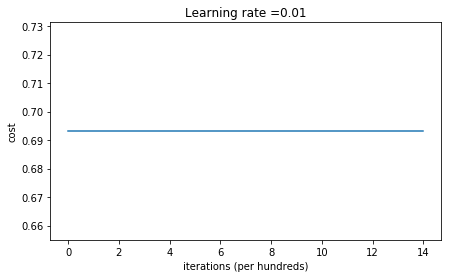

On the train set:
Accuracy: 0.5
On the test set:
Accuracy: 0.5


In [22]:
# 用全0初始化法进行参数训练
parameters = model(train_X, train_Y, initialization = "zeros")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters) # 对训练数据进行预测，并打印出准确度
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters) # 对测试数据进行预测，并打印出准确度

从上面的图表我们可以看出，成本完全没有下降，说明根本就一点都没有优化到。0.5的精确度就像赌单双一样，完全没有预测的能力。下面我们在把预测结果打印出来。可以看到，神经网络全部预测它们为0.

In [23]:
print("predictions_train = " + str(predictions_train))
print("predictions_test = " + str(predictions_test))

predictions_train = [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0]]
predictions_test = [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


为什么会这样呢？这个在我们本小节的文章里面已经解释了——如果初始化参数为0，那么神经网络的每一层都只会学习到同样的东西，也就是说，一万层的神经网络和一层的单神经网络一样一样了。

为了使每一层每一个神经元都能学到不同的东西，我们需要将参数进行随机初始化。下面这个方法就是对神经网络进行参数随机初始化。

In [24]:
def initialize_parameters_random(layers_dims):  
    np.random.seed(3) 
    parameters = {}
    L = len(layers_dims) 
    
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l - 1]) * 10
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
    return parameters

In [25]:
parameters = initialize_parameters_random([3, 2, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 17.88628473   4.36509851   0.96497468]
 [-18.63492703  -2.77388203  -3.54758979]]
b1 = [[0.]
 [0.]]
W2 = [[-0.82741481 -6.27000677]]
b2 = [[0.]]


Cost after iteration 0: inf
Cost after iteration 1000: 0.6247924745506072
Cost after iteration 2000: 0.5980258056061102
Cost after iteration 3000: 0.5637539062842213
Cost after iteration 4000: 0.5501256393526495
Cost after iteration 5000: 0.5443826306793814
Cost after iteration 6000: 0.5373895855049121
Cost after iteration 7000: 0.47157999220550006
Cost after iteration 8000: 0.39770475516243037
Cost after iteration 9000: 0.3934560146692851
Cost after iteration 10000: 0.3920227137490125
Cost after iteration 11000: 0.38913700035966736
Cost after iteration 12000: 0.3861358766546214
Cost after iteration 13000: 0.38497629552893475
Cost after iteration 14000: 0.38276694641706693


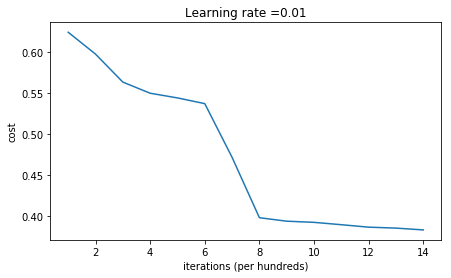

On the train set:
Accuracy: 0.83
On the test set:
Accuracy: 0.86


In [26]:
parameters = model(train_X, train_Y, initialization = "random")
print("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

上面就是随机初始化后神经网络的表现。如果上面结果中的第一次训练后的成本是inf，请先不要在意，这个问题我们以后在讨论。

可以看出。随机初始化参数后，神经网络的表现就明显不同了。精准度提升到了0.8. 下面打印出的预测结果和图表也显示不再全部
都是零了。说明这个神经网络已经有了一些预测能力了。

In [27]:
print(predictions_train)
print(predictions_test)

[[1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1
  1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0
  0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0
  1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0
  0 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1
  1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1
  0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1
  1 1 0 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1
  1 1 1 1 0 0 0 1 1 1 1 0]]
[[1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1
  0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0
  1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0]]


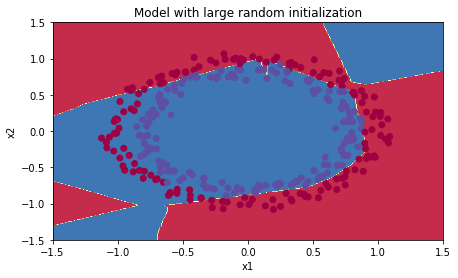

In [28]:
plt.title("Model with large random initialization")
axes = plt.gca()
axes.set_xlim([-1.5, 1.5])
axes.set_ylim([-1.5, 1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

但是我们还可以继续参数的初始化方法，使神经网络更加强大。

从上面的成本图可以看出，成本开始时特别大。这是因为我们将参数初始化成了很大的值，这就会导致神经网络在前期对预测太绝对了，不是0就是1，如果预测错了，就会导致成本很大。

参数初始化得不对会导致训练效率很差，需要训练很长时间才能靠近理想值。下面的代码中，你可以将训练次数改大一些，你会看到，训练得越久，成本会越来越小，预测精准度越来越高。

参数初始化得不对，还会导致梯度消失和爆炸。

最后给大家演示一下我们文章2.1.8中提到的参数初始化方法。

In [29]:
def initialize_parameters_he(layers_dims):    
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims) - 1
     
    for l in range(1, L + 1):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l - 1]) * np.sqrt(2 / layers_dims[l - 1])
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
        
    return parameters

In [30]:
parameters = initialize_parameters_he([2, 4, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 1.78862847  0.43650985]
 [ 0.09649747 -1.8634927 ]
 [-0.2773882  -0.35475898]
 [-0.08274148 -0.62700068]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.03098412 -0.33744411 -0.92904268  0.62552248]]
b2 = [[0.]]


Cost after iteration 0: 0.8830537463419761
Cost after iteration 1000: 0.6879825919728063
Cost after iteration 2000: 0.6751286264523371
Cost after iteration 3000: 0.6526117768893805
Cost after iteration 4000: 0.6082958970572938
Cost after iteration 5000: 0.5304944491717495
Cost after iteration 6000: 0.4138645817071794
Cost after iteration 7000: 0.3117803464844441
Cost after iteration 8000: 0.23696215330322562
Cost after iteration 9000: 0.1859728720920684
Cost after iteration 10000: 0.15015556280371808
Cost after iteration 11000: 0.12325079292273551
Cost after iteration 12000: 0.09917746546525937
Cost after iteration 13000: 0.08457055954024283
Cost after iteration 14000: 0.07357895962677366


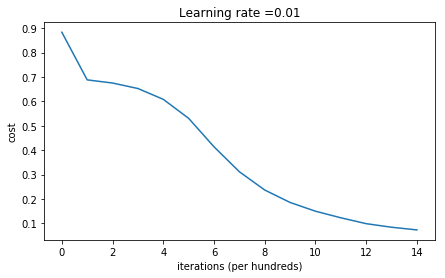

On the train set:
Accuracy: 0.9933333333333333
On the test set:
Accuracy: 0.96


In [31]:
parameters = model(train_X, train_Y, initialization = "he")
print("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

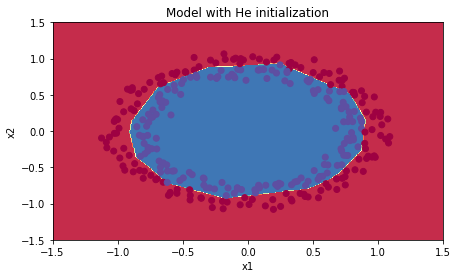

In [32]:
plt.title("Model with He initialization")
axes = plt.gca()
axes.set_xlim([-1.5, 1.5])
axes.set_ylim([-1.5, 1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

怎么样。看到上面的结果是不是很惊讶？~~ 从0.5到了0.96.神经网络其它的什么都没有变，只是改变了对参数的初始化方法。
可想而知，对参数的初始化是多么的重要。

只是运用了我们文章中的一点点知识，就使得神经网络瞬间从一个弱智变成了一个智能体。所以大家要有耐心学好每一篇文章，不要只贪图快，要真正的理解知识点。我可以向大家保证，我发布的每一篇文章，对你们将来的人工智能事业都是有帮助的。